Episode 1: Total Reward = 16.0
Episode 2: Total Reward = 25.0
Episode 3: Total Reward = 26.0
Episode 4: Total Reward = 25.0
Episode 5: Total Reward = 22.0
Episode 6: Total Reward = 22.0
Episode 7: Total Reward = 14.0
Episode 8: Total Reward = 67.0
Episode 9: Total Reward = 13.0
Episode 10: Total Reward = 28.0


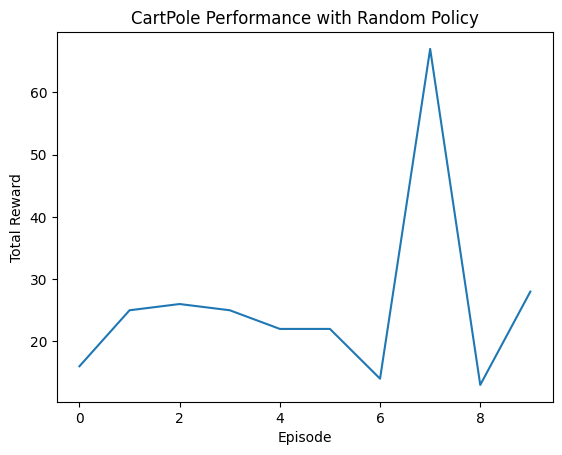

In [8]:
#LAB 4

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

def random_policy():
    return np.random.choice([0, 1])

def run_cartpole(env, policy, episodes=10):
    episode_rewards = []
    for episode in range(episodes):
        observation, info = env.reset()
        done = False
        total_reward = 0
        while not done:
            action = policy()
            observation, reward, terminated, truncated, info = env.step(action)
            total_reward += reward
            done = terminated or truncated
        episode_rewards.append(total_reward)
        print(f"Episode {episode + 1}: Total Reward = {total_reward}")

    plt.plot(episode_rewards)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("CartPole Performance with Random Policy")
    plt.show()


if __name__ == "__main__":
    env = gym.make("CartPole-v1")
    run_cartpole(env, random_policy)
    env.close()


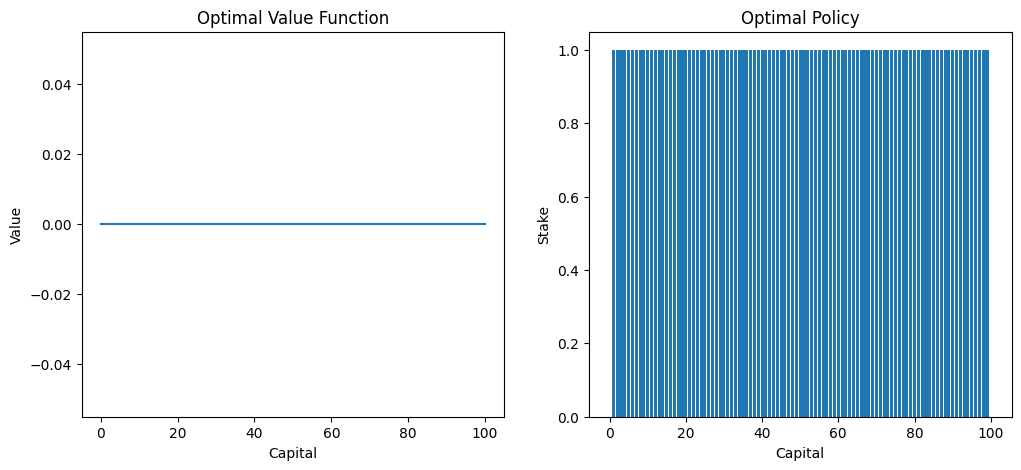

In [9]:
#LAB 6 - VALUE INTERATION ON GAMBLERS PROBLEM

import numpy as np
import matplotlib.pyplot as plt

def gambler_value_iteration(p_h=0.4, theta=1e-9, gamma=1.0):
    goal = 100
    V = np.zeros(goal + 1)
    policy = np.zeros(goal + 1)

    while True:
        delta = 0
        for s in range(1, goal):
            actions = np.arange(1, min(s, goal - s) + 1)
            action_returns = [p_h * (gamma * V[s + a]) + (1 - p_h) * (gamma * V[s - a]) for a in actions]
            max_return = max(action_returns)
            delta = max(delta, abs(max_return - V[s]))
            V[s] = max_return

        if delta < theta:
            break

    for s in range(1, goal):
        actions = np.arange(1, min(s, goal - s) + 1)
        action_returns = [p_h * (gamma * V[s + a]) + (1 - p_h) * (gamma * V[s - a]) for a in actions]
        policy[s] = actions[np.argmax(action_returns)]

    return V, policy

def plot_results(V, policy):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(V)
    plt.xlabel("Capital")
    plt.ylabel("Value")
    plt.title("Optimal Value Function")

    plt.subplot(1, 2, 2)
    plt.bar(range(len(policy)), policy)
    plt.xlabel("Capital")
    plt.ylabel("Stake")
    plt.title("Optimal Policy")

    plt.show()

if __name__ == "__main__":
    V, policy = gambler_value_iteration()
    plot_results(V, policy)
